# Praktische Übung 5: Ensemble Learning

In diesem Notebook werden wir verschiedene Formen des "Ensemble Learning" einsetzen und einen einfachen Bagging-Algorithmus selbst implementieren.

Vorab initialisieren wir die Zufallsgeneratoren um vergleichbare Ergebnisse zu erhalten:

In [1]:
import numpy as np
import random
np.random.seed(0)
random.seed(0)

In [2]:
import sklearn
print("Numpy version:", np.__version__)
print("Sklearn version:", sklearn.__version__)

Numpy version: 1.21.5
Sklearn version: 1.1.1


### Daten laden

Für diese Übung verwenden wir den [Wein-Datensatz](https://archive.ics.uci.edu/ml/datasets/wine), welcher ebenfalls ein bekannter Datensatz in der ML-Welt ist.
Die offizielle Beschreibung lautet:
```
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
```
Anhand dieser Merkmale soll die Qualität (Spalte `quality`) des Weins vorhergesagt werden. 

In [3]:
import pandas as pd
df = pd.read_csv("data/wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Bevor wir loslegen, schauen wir uns die Verteilung des Labels an:

<AxesSubplot:>

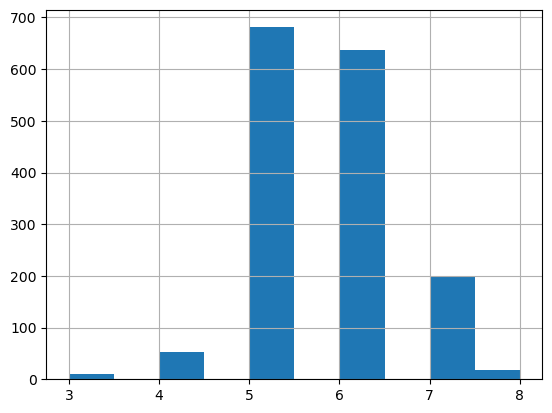

In [4]:
df['quality'].hist()

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Aufgabe 1: Decision Tree, Random Forest, GBT
Trainieren Sie die folgenden Modelle und ermitteln Sie die Accuarcy auf den Testdaten. Geben Sie dabei jeweils den Parameter `random_state=0` bei der Erstellung des Modells and und beschränken Sie die maximale Baumtiefe auf `max_depth=3`.
- Einfacher Entscheidungsbaum (`DecisionTreeClassifier`)
- Random Forest (`RandomForestClassifier`)
- GBT (`GradientBoostingClassifier`)

Hinweis: Für diese Modelle müssen wir die Daten nicht skalieren und kein One-hot-encoding durchführen.

#### Aufgabe 1

In [6]:
from sklearn.metrics import accuracy_score

#Einfacher Entscheidungsbaum
from sklearn.tree import DecisionTreeClassifier
model_T = DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=3)
model_T.fit(X_train, y_train)

predictions_T = model_T.predict(X_test)

print("Der Accuracyscore ist", accuracy_score(y_test, predictions_T)) 

#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_F = RandomForestClassifier(random_state=0, max_depth=3)
model_F.fit(X_train, y_train)

predictions_F = model_F.predict(X_test)

acc_F = accuracy_score(y_test, predictions_F)

print("Der Accuracyscore vom Random Forest ist:", acc_F)

#Gradient Boosting Tree
from sklearn.ensemble import GradientBoostingClassifier
model_G = GradientBoostingClassifier(random_state=0, max_depth=3)
model_G.fit(X_train, y_train)

predictions_G = model_G.predict(X_test)
acc_G = accuracy_score(y_test, predictions_G)

print("Der Accuracyscore vom GBT ist:", acc_G)

Der Accuracyscore ist 0.575
Der Accuracyscore vom Random Forest ist: 0.659375
Der Accuracyscore vom GBT ist: 0.6875


### Aufgabe 2: GBT Tuning
Der `GradientBoostingClassifier` und der `RandomForest` haben als Hyperparameter u.a. die Anzahl der Bäume die trainiert werden (`n_estimators`) und die maximale Baumtiefe (`max_depth`), siehe [hier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

- Führen Sie für beide Modelle ein Cross-Validierung über diese Hyperparameter durch, betrachten Sie dabei folgende Werte:  $n\_estimators \in [60, 80, 100, 120, 140]$ und $max\_depth \in [2, 3, 4, 5]$. Nehmen Sie das Notebook `6_TreeEnsembles` auf unserem GitHub als Vorlage. Hinweis: Sie können alle Hyperparameter auf einmal übergeben. Mehr Details finden Sie wenn Sie [hier](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) bis nach unten zum Code-Beispiel scrollen.
- Welches sind die besten Parameter für `max_depth` und `n_estimators` und welches ist das bessere Modell?
- Trainieren Sie das bessere Modelle mit den besten Parametern und machen Sie eine Vorhersage auf den Testdaten. Vergleichen Sie die Ergebnisse mit Aufgabe 1.

#### Aufgabe 2

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_candidates = [{'max_depth':[2, 3, 4, 5],
                       'n_estimators':[60, 80, 100, 120, 140]}]

gbt = GradientBoostingClassifier(random_state=0)
grid_clf = GridSearchCV(estimator=gbt, param_grid=parameter_candidates, n_jobs=-1)
grid_clf.fit(X_train, y_train)

print("Best max_depth:",grid_clf.best_estimator_.max_depth)
print("Best n_estimators", grid_clf.estimator.n_estimators_)
print("Best score:", grid_clf.best_score_)


In [8]:
#besseres Modell mit besten Parametern
model = GradientBoostingClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Accuracyscore mit besten Parametern:", acc)

Accuracyscore mit besten Parametern: 0.7


### Aufgabe 3: Bagging-Modell 

Implementieren Sie ein Bagging-Modell von Hand (d.h. nicht die Sklearn-Library verwenden) und testen Sie es auf den Testdaten. Das Bagging-Modell soll folgende Eigenschaften haben:
- Das Modell soll 10 Basismodelle haben, welche einfache `DecisionTreeClassifier` sind.
- Jeder dieser DecisionTrees soll auf 70% der Trainingsdaten trainiert werden (Sampling mit Zurücklegen). Tipp: Nutzen Sie `X_train.sample(...)`.
- Bei der Vorhersage soll die am häufigsten vorhergesagte Klasse als Gesamtvorhersage dienen.
- Testen Sie das Modell auf den Testdaten.

In [43]:
df.sample

models = []
for i in range(0,9):
    clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=3)
    models.append(clf)
    
data_amount = X_train.shape[0]
sample_size = data_amount * 0.7

y_train
for i in range(0,9):
        models[i].fit(X_train.sample(int(sample_size)),y_train.sample(int(sample_size)))

